<a href="https://colab.research.google.com/github/Didier06/IA_licence_pro_chimie/blob/main/Bayes_RDKIT_Toxicite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🧪 Installation et imports pour Colab
# ------------------------------------
!pip install rdkit scikit-learn pandas seaborn matplotlib -q

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import quote_plus

print("✅ Imports réussis — RDKit prêt à l'emploi")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 25.0 MB/s eta 0:00:00
✅ Imports réussis — RDKit prêt à l'emploi


2️⃣ Chargement du jeu de données
➡️ Télécharge d’abord le fichier qsar_oral_toxicity.csv depuis :
https://archive.ics.uci.edu/ml/datasets/QSAR%2Boral%2Btoxicity
et place-le dans le même dossier que ce notebook.

In [3]:
# Téléchargement qsar_oral_toxicity.csv

# Lecture correcte du fichier
df = pd.read_csv("qsar_oral_toxicity.csv", sep=";", header=None)
n_features = df.shape[1] - 1
df.columns = [f"X{i}" for i in range(n_features)] + ["CLASS"]

print("✅ Dataset chargé :", df.shape)
print(df["CLASS"].value_counts())


✅ Dataset chargé : (8992, 1025)
CLASS
negative    8251
positive     741
Name: count, dtype: int64


In [4]:
# 2️⃣ Entraînement rapide du modèle Naïve Bayes
X = df.drop(columns=["CLASS"])
y = df["CLASS"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = GaussianNB()
model.fit(X_train, y_train)

print("📊 Accuracy sur jeu de test :", round(model.score(X_test, y_test), 3))


📊 Accuracy sur jeu de test : 0.78


Exemples de SMILES :
 - Caféine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C
 - Aspirine    : CC(=O)Oc1ccccc1C(=O)O
 - Paracétamol : C(=O)NC1=CC=C(C=C1)OC

💊 Entrez le SMILES de la molécule à tester : Cn1cnc2c1c(=O)n(C)c(=O)n2C


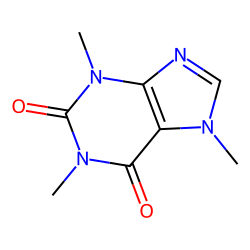

In [12]:
# 3️⃣ Entrée d'une molécule (par SMILES ou nom commun via exemple)
print("Exemples de SMILES :")
print(" - Caféine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C")
print(" - Aspirine    : CC(=O)Oc1ccccc1C(=O)O")
print(" - Paracétamol : C(=O)NC1=CC=C(C=C1)OC")

smiles = input("\n💊 Entrez le SMILES de la molécule à tester : ")
mol = Chem.MolFromSmiles(smiles)
if mol is None:
    raise ValueError("❌ SMILES invalide, réessayez.")

Draw.MolToImage(mol, size=(250,250))


In [13]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

# Création du générateur ECFP4 (radius=2, nBits=1024)
gen = GetMorganGenerator(radius=2, fpSize=1024)
fp = gen.GetFingerprint(mol)
fp_array = list(map(int, fp.ToBitString()))


# 4️⃣ Calcul de l'empreinte ECFP4 (1024 bits) et prédiction
#fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
#fp_array = list(map(int, fp.ToBitString()))

X_new = pd.DataFrame([fp_array], columns=X_train.columns)

prediction = model.predict(X_new)[0]
proba = model.predict_proba(X_new)[0]

# Interprétation pédagogique
p_tox = proba[ list(model.classes_).index("positive") ]
niveau = (
    "🟢 Faible probabilité de toxicité"
    if p_tox < 0.3 else
    "🟠 Probabilité modérée de toxicité"
    if p_tox < 0.7 else
    "🔴 Probabilité élevée de toxicité"
)

print(f"\n🔬 Molécule : {smiles}")
print(f"Classe prédite : {prediction}")
print(f"Probabilités → non toxique : {round(proba[ list(model.classes_).index('negative') ],2)} | toxique : {round(p_tox,2)}")
print(niveau)



🔬 Molécule : Cn1cnc2c1c(=O)n(C)c(=O)n2C
Classe prédite : negative
Probabilités → non toxique : 1.0 | toxique : 0.0
🟢 Faible probabilité de toxicité


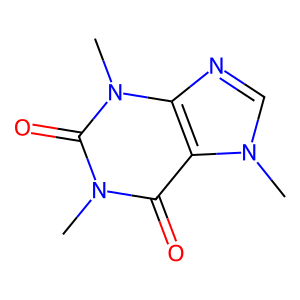

In [14]:
# 5️⃣ Affichage de la molécule et lien vers ProTox-II pour comparaison
from IPython.display import display, HTML

img = Draw.MolToImage(mol, size=(300,300))
display(img)

lien_protox = "https://tox-new.charite.de/protox_II/index.php?smiles=" + quote_plus(smiles)
display(HTML(f"<b>🔗 Tester cette molécule sur <a href='{lien_protox}' target='_blank'>ProTox-II</a></b>"))


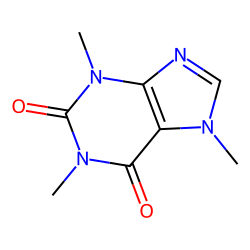


🔬 Molécule : Cn1cnc2c1c(=O)n(C)c(=O)n2C
Classe prédite : negative
Probabilités → non toxique : 1.0 | toxique : 0.0
🟢 Faible probabilité de toxicité
✅ Le modèle prédit que cette molécule est probablement NON TOXIQUE (negative).


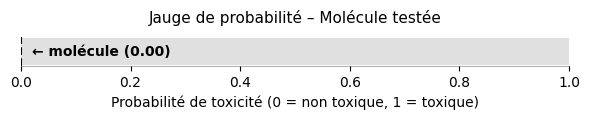

In [15]:
# 🧪 Calcul de l'empreinte moléculaire ECFP4 (1024 bits) et prédiction sans avertissement RDKit
from rdkit.Chem import Draw
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import matplotlib.pyplot as plt

# Vérification du SMILES
if mol is None:
    raise ValueError(f"❌ SMILES invalide : {smiles}")

# Affichage de la molécule
display(Draw.MolToImage(mol, size=(250, 250)))

# Générateur d'empreintes ECFP4 (nouvelle API RDKit, sans warning)
gen = GetMorganGenerator(radius=2, fpSize=1024)
fp = gen.GetFingerprint(mol)
fp_array = list(map(int, fp.ToBitString()))

# Préparation des données pour le modèle
X_new = pd.DataFrame([fp_array], columns=X_train.columns)

# Prédiction
prediction = model.predict(X_new)[0]
proba = model.predict_proba(X_new)[0]

# Probabilité associée à la classe "positive"
p_tox = proba[list(model.classes_).index("positive")]

# Niveau d’interprétation
niveau = (
    "🟢 Faible probabilité de toxicité"
    if p_tox < 0.3 else
    "🟠 Probabilité modérée de toxicité"
    if p_tox < 0.7 else
    "🔴 Probabilité élevée de toxicité"
)

# Affichage textuel
print(f"\n🔬 Molécule : {smiles}")
print(f"Classe prédite : {prediction}")
print(f"Probabilités → non toxique : {round(proba[list(model.classes_).index('negative')], 2)} | toxique : {round(p_tox, 2)}")
print(niveau)

# Message synthétique
if prediction == "positive":
    print("⚠️ Le modèle prédit que cette molécule pourrait être TOXIQUE (positive).")
else:
    print("✅ Le modèle prédit que cette molécule est probablement NON TOXIQUE (negative).")

# 🎯 Jauge de probabilité de toxicité avec repère de la molécule testée
fig, ax = plt.subplots(figsize=(6, 1.3))

# Couleur en fonction du niveau de toxicité
color = "green" if p_tox < 0.3 else "orange" if p_tox < 0.7 else "red"

# Barre horizontale représentant l'échelle 0 → 1
ax.barh(["Toxicité prédite"], [1], color="#e0e0e0", height=0.3)  # fond gris clair
ax.barh(["Toxicité prédite"], [p_tox], color=color, height=0.3)  # portion colorée

# Ligne verticale (repère de la molécule)
ax.axvline(p_tox, color="black", linestyle="--", linewidth=1.5)
ax.text(p_tox + 0.02, 0, f"← molécule ({p_tox:.2f})", va="center", fontsize=10, fontweight="bold")

# Réglages de l'axe
ax.set_xlim(0, 1)
ax.set_xlabel("Probabilité de toxicité (0 = non toxique, 1 = toxique)")
ax.set_title("Jauge de probabilité – Molécule testée", fontsize=11, pad=10)

# Masquer les repères inutiles
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)

plt.tight_layout()
plt.show()

